# 주택가격 데이터 분석

## 순서
0. 데이터 확인
1. 필요 라이브러리 임포트 및 파일 읽어오기
2. EDA 탐색적 데이터 분석
3. 데이터 전처리 수행
 - 필요한 컬럼 정리
 - 컬럼 데이터 정제
 - Null 처리
 - 컬럼 type 변경하기
4. 데이터 시각화
5. 결과 저장

# 0.데이터 확인

https://data.kbland.kr/

- 데이터: [KB부동산 데이터 허브](https://data.kbland.kr/) → KB 통계 → 주택가격동향조사
    - [주간 아파트 매매가격지수](https://data.kbland.kr/kbstats/wmh?tIdx=HT01&tsIdx=weekAptSalePriceInx) 전체('24년 10월 7일 기준)
    - [주간 아파트 전세가격지수](https://data.kbland.kr/kbstats/wmh?tIdx=HT01&tsIdx=weekAptRentPriceInx) 전체('24년 10월 7일 기준)
- 가격지수: 기준시점(22년 1월 10일) 대비 조사 시점(24년 10월)의 가격 비율 (주택별·지역별 가중)
- 지역별 날짜별 매매가격지수, 전세가격지수 시각화를 통한 트렌드 분석
- 매매가격지수와 전세가격지수의 관계 시각화
- 매매가격지수와 전세가격지수의 차이가 큰/적은 지역 판단

# 1.필요 라이브러리 임포트 및 파일 읽어오기

In [100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
#import matplotlib.font_manager as fm

#for i in fm.fontManager.ttflist:
    #if i.name.find('Gothic') != -1 : #Gulim, NanumGothic
       # print(i.name)
from matplotlib import rcParams
rcParams['font.family'] = 'Malgun Gothic' #matplotlib에 사용할 기본폰트를 지정
rcParams['axes.unicode_minus'] = False



In [101]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

## CSV 파일 데이터 읽어오기

In [89]:
sales = pd.read_excel('../data/주간 아파트 매매가격지수_20241026.xlsx')
lease = pd.read_excel('../data/주간 아파트 전세가격지수_20241026.xlsx')

In [90]:
#sales = sales[2:29]
#lease = lease[2:29]

In [91]:
sales.head()

,지역명,2022-10-24 00:00:52,2022-10-31 00:00:52,2022-11-07 00:00:52,2022-11-14 00:00:52,2022-11-21 00:00:52,2022-11-28 00:00:52,2022-12-05 00:00:52,2022-12-12 00:00:52,2022-12-19 00:00:52,...,2024-08-12 00:00:52,2024-08-19 00:00:52,2024-08-26 00:00:52,2024-09-02 00:00:52,2024-09-09 00:00:52,2024-09-23 00:00:52,2024-09-30 00:00:52,2024-10-07 00:00:52,2024-10-14 00:00:52,2024-10-21 00:00:52
0,전국,99.070849,98.795106,98.501147,98.057422,97.67074,97.354538,96.888385,96.569873,96.149852,...,89.405868,89.439824,89.486678,89.530720,89.566492,89.596423,89.615430,89.641072,89.660654,89.659354
1,서울,99.18946,98.891016,98.575584,98.21648,97.889642,97.564187,97.155318,96.809521,96.361279,...,91.555361,91.783405,92.008437,92.208397,92.354427,92.520904,92.603639,92.700462,92.815979,92.886076
2,강북14개구,98.642112,98.340583,98.052583,97.612834,97.32794,97.032485,96.620466,96.316564,95.883823,...,88.664465,88.818466,88.998513,89.147868,89.256582,89.367506,89.416088,89.494905,89.579069,89.621939
3,종로구,101.272184,101.272184,101.268392,101.099196,101.099196,101.058259,101.051544,100.986561,100.986561,...,98.810194,98.870809,99.008700,99.156805,99.250936,99.319963,99.304188,99.310792,99.308945,99.309707
4,중구,99.717712,99.436605,99.392767,99.293241,98.213935,97.96398,97.632394,97.478444,97.451176,...,94.372539,94.747151,94.884112,95.088102,95.561633,95.700824,95.731491,95.852437,95.935588,96.025635


In [92]:
sales.reset_index()

,index,지역명,2022-10-24 00:00:52,2022-10-31 00:00:52,2022-11-07 00:00:52,2022-11-14 00:00:52,2022-11-21 00:00:52,2022-11-28 00:00:52,2022-12-05 00:00:52,2022-12-12 00:00:52,...,2024-08-12 00:00:52,2024-08-19 00:00:52,2024-08-26 00:00:52,2024-09-02 00:00:52,2024-09-09 00:00:52,2024-09-23 00:00:52,2024-09-30 00:00:52,2024-10-07 00:00:52,2024-10-14 00:00:52,2024-10-21 00:00:52
0,0,전국,99.070849,98.795106,98.501147,98.057422,97.67074,97.354538,96.888385,96.569873,...,89.405868,89.439824,89.486678,89.530720,89.566492,89.596423,89.615430,89.641072,89.660654,89.659354
1,1,서울,99.18946,98.891016,98.575584,98.21648,97.889642,97.564187,97.155318,96.809521,...,91.555361,91.783405,92.008437,92.208397,92.354427,92.520904,92.603639,92.700462,92.815979,92.886076
2,2,강북14개구,98.642112,98.340583,98.052583,97.612834,97.32794,97.032485,96.620466,96.316564,...,88.664465,88.818466,88.998513,89.147868,89.256582,89.367506,89.416088,89.494905,89.579069,89.621939
3,3,종로구,101.272184,101.272184,101.268392,101.099196,101.099196,101.058259,101.051544,100.986561,...,98.810194,98.870809,99.008700,99.156805,99.250936,99.319963,99.304188,99.310792,99.308945,99.309707
4,4,중구,99.717712,99.436605,99.392767,99.293241,98.213935,97.96398,97.632394,97.478444,...,94.372539,94.747151,94.884112,95.088102,95.561633,95.700824,95.731491,95.852437,95.935588,96.025635
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273,273,무주군,-,-,-,101.749994,101.749994,101.749994,101.749994,101.749994,...,97.373097,97.733738,97.733738,97.733738,97.733738,97.733738,97.733738,97.733738,97.733738,97.733738
274,274,임실군,-,-,-,105.794201,105.794201,105.794201,105.794201,105.794201,...,104.121788,104.440154,104.756939,105.072164,105.385847,105.698009,105.698009,106.008669,106.008669,106.627020
275,275,순창군,-,-,-,-,-,-,-,-,...,98.786649,98.786649,100.103644,100.103644,100.103644,100.103644,100.103644,100.103644,100.103644,100.103644
276,276,고창군,-,-,-,111.729221,111.729221,111.729221,111.729221,111.729221,...,119.501689,119.501689,119.501689,119.323980,119.323980,119.930349,119.930349,119.930349,120.311909,120.425654


In [93]:
sales_melt = sales.melt(
    id_vars=['지역명'],
    var_name='날짜',
    value_name='가격'
)
sales_melt

,지역명,날짜,가격
0,전국,2022-10-24 00:00:52,99.070849
1,서울,2022-10-24 00:00:52,99.18946
2,강북14개구,2022-10-24 00:00:52,98.642112
3,종로구,2022-10-24 00:00:52,101.272184
4,중구,2022-10-24 00:00:52,99.717712
...,...,...,...
28073,무주군,2024-10-21 00:00:52,97.733738
28074,임실군,2024-10-21 00:00:52,106.62702
28075,순창군,2024-10-21 00:00:52,100.103644
28076,고창군,2024-10-21 00:00:52,120.425654


In [94]:
sales_melt

,지역명,날짜,가격
0,전국,2022-10-24 00:00:52,99.070849
1,서울,2022-10-24 00:00:52,99.18946
2,강북14개구,2022-10-24 00:00:52,98.642112
3,종로구,2022-10-24 00:00:52,101.272184
4,중구,2022-10-24 00:00:52,99.717712
...,...,...,...
28073,무주군,2024-10-21 00:00:52,97.733738
28074,임실군,2024-10-21 00:00:52,106.62702
28075,순창군,2024-10-21 00:00:52,100.103644
28076,고창군,2024-10-21 00:00:52,120.425654


In [95]:
sales_melt['날짜']=pd.to_datetime(sales_melt['날짜'])
sales_melt['날짜'] = sales_melt['날짜'].dt.date

In [96]:
sales_melt.isnull().sum()

지역명    0
날짜     0
가격     0
dtype: int64

In [97]:
seoul = sales_melt[sales_melt['지역명'] == '서울']
print(seoul.max())
print(seoul.min())

지역명            서울
날짜     2024-10-21
가격       99.18946
dtype: object
지역명            서울
날짜     2022-10-24
가격      90.129838
dtype: object


<Axes: xlabel='날짜', ylabel='가격'>

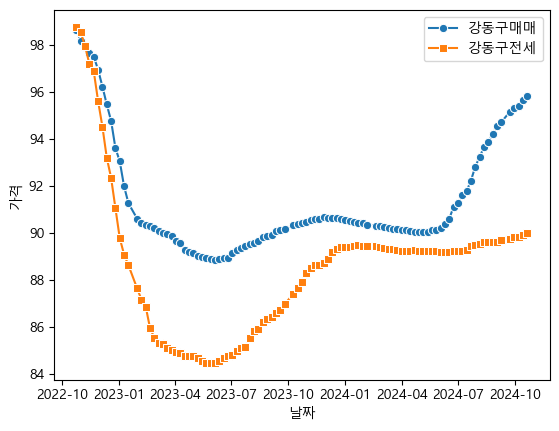

In [128]:
sns.lineplot(data=sales_melt.loc[sales_melt['지역명'] == '강동구'], x='날짜', y='가격', marker='o', label='강동구매매')
sns.lineplot(data=lease_melt.loc[sales_melt['지역명'] == '강동구'],  x='날짜', y='가격', marker='s', label='강동구전세')

In [159]:
locals

array(['강북14개구', '종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구',
       '강북구', '도봉구', '노원구', '은평구', '서대문구', '마포구', '강남11개구', '양천구', '강서구',
       '구로구', '금천구', '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구'],
      dtype=object)

fig2 = plt.figure(figsize=(14, local_cnt * 3), constrained_layout=True)
outer_grid = fig2.add_gridspec(local_cnt, 1)


for i in range(local_cnt):
    ax = fig2.add_subplot(outer_grid[i, :])
    ax.plot(sales_melt.loc[sales_melt['지역명'] == 'i'],
            label=f'{i}_매매',
            color='olive')
    ax.plot(lease_melt.loc[sales_melt['지역명'] == 'i'],
            label=f'{i}_전세',
            color='blue')
    ax.legend()

plt.tight_layout()
plt.show()

In [162]:
for i in range(지역수):
    # 지역 이름을 locals_list에서 가져옵니다
    local_region = locals[i]  # 지역 이름을 가져옵니다
    ax = fig2.add_subplot(outer_grid[i, :])
    
    # 매매 데이터 플롯
    ax.plot(sales_melt.loc[sales_melt['지역명'] == local_region, '가격'],
            label=f'{local_region}_매매',
            color='olive')
    
    # 전세 데이터 플롯
    ax.plot(lease_melt.loc[lease_melt['지역명'] == local_region, '가격'],
            label=f'{local_region}_전세',
            color='blue')
    
    ax.legend()
    ax.set_title(f"{local_region} 매매가 및 전세가 비교")
    ax.set_xlabel('날짜')
    ax.set_ylabel('가격')
    ax.tick_params(axis='x', rotation=45)
    ax.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

In [69]:
lease.head()

,지역명,2022-10-24 00:00:52,2022-10-31 00:00:52,2022-11-07 00:00:52,2022-11-14 00:00:52,2022-11-21 00:00:52,2022-11-28 00:00:52,2022-12-05 00:00:52,2022-12-12 00:00:52,2022-12-19 00:00:52,...,2024-08-12 00:00:52,2024-08-19 00:00:52,2024-08-26 00:00:52,2024-09-02 00:00:52,2024-09-09 00:00:52,2024-09-23 00:00:52,2024-09-30 00:00:52,2024-10-07 00:00:52,2024-10-14 00:00:52,2024-10-21 00:00:52
0,전국,99.3345,99.026016,98.623536,98.108772,97.557092,97.04603,96.402228,95.848864,95.217212,...,89.550844,89.611102,89.672679,89.736133,89.798015,89.844913,89.879095,89.940154,90.000649,90.056928
1,서울,98.986567,98.577326,98.043303,97.462394,96.726882,96.015176,95.16246,94.259268,93.413704,...,90.402445,90.557136,90.728307,90.879245,91.040533,91.133295,91.197498,91.311451,91.407403,91.505092
2,강북14개구,99.076653,98.631199,98.203469,97.662143,96.975049,96.416485,95.711619,95.000845,94.308194,...,90.537136,90.675880,90.874157,91.052678,91.205271,91.294162,91.351153,91.463412,91.562034,91.643295
3,종로구,100.130635,100.09141,100.062392,99.302315,99.099819,99.012114,98.415947,98.161897,97.97901,...,95.063972,95.327168,95.606297,95.791750,96.025197,96.292064,96.692286,96.903939,97.175760,97.418567
4,중구,98.870586,98.686393,98.649147,98.332346,96.326474,95.756558,94.816725,94.35589,93.859068,...,91.997990,92.257386,92.275563,92.320068,92.735072,92.780202,92.821343,92.821343,92.841815,92.857078


In [70]:
lease.reset_index()

,index,지역명,2022-10-24 00:00:52,2022-10-31 00:00:52,2022-11-07 00:00:52,2022-11-14 00:00:52,2022-11-21 00:00:52,2022-11-28 00:00:52,2022-12-05 00:00:52,2022-12-12 00:00:52,...,2024-08-12 00:00:52,2024-08-19 00:00:52,2024-08-26 00:00:52,2024-09-02 00:00:52,2024-09-09 00:00:52,2024-09-23 00:00:52,2024-09-30 00:00:52,2024-10-07 00:00:52,2024-10-14 00:00:52,2024-10-21 00:00:52
0,0,전국,99.3345,99.026016,98.623536,98.108772,97.557092,97.04603,96.402228,95.848864,...,89.550844,89.611102,89.672679,89.736133,89.798015,89.844913,89.879095,89.940154,90.000649,90.056928
1,1,서울,98.986567,98.577326,98.043303,97.462394,96.726882,96.015176,95.16246,94.259268,...,90.402445,90.557136,90.728307,90.879245,91.040533,91.133295,91.197498,91.311451,91.407403,91.505092
2,2,강북14개구,99.076653,98.631199,98.203469,97.662143,96.975049,96.416485,95.711619,95.000845,...,90.537136,90.675880,90.874157,91.052678,91.205271,91.294162,91.351153,91.463412,91.562034,91.643295
3,3,종로구,100.130635,100.09141,100.062392,99.302315,99.099819,99.012114,98.415947,98.161897,...,95.063972,95.327168,95.606297,95.791750,96.025197,96.292064,96.692286,96.903939,97.175760,97.418567
4,4,중구,98.870586,98.686393,98.649147,98.332346,96.326474,95.756558,94.816725,94.35589,...,91.997990,92.257386,92.275563,92.320068,92.735072,92.780202,92.821343,92.821343,92.841815,92.857078
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273,273,무주군,-,-,-,101.195498,101.195498,101.195498,101.195498,101.195498,...,117.988925,117.988925,117.988925,117.988925,117.988925,117.988925,117.988925,117.988925,117.988925,117.988925
274,274,임실군,-,-,-,101.195498,101.195498,101.195498,101.195498,101.195498,...,107.082721,107.082721,107.082721,107.082721,107.082721,107.082721,107.082721,107.082721,107.082721,107.082721
275,275,순창군,-,-,-,-,-,-,-,-,...,99.274467,99.274467,99.274467,99.274467,99.274467,99.274467,99.274467,99.274467,99.274467,99.274467
276,276,고창군,-,-,-,104.637259,104.637259,104.637259,104.637259,104.637259,...,112.145062,112.145062,112.145062,112.145062,112.145062,113.191030,113.191030,113.191030,113.191030,113.191030


In [71]:
lease_melt = lease.melt(
    id_vars=['지역명'],
    var_name='날짜',
    value_name='가격'
)
lease_melt

,지역명,날짜,가격
0,전국,2022-10-24 00:00:52,99.3345
1,서울,2022-10-24 00:00:52,98.986567
2,강북14개구,2022-10-24 00:00:52,99.076653
3,종로구,2022-10-24 00:00:52,100.130635
4,중구,2022-10-24 00:00:52,98.870586
...,...,...,...
28073,무주군,2024-10-21 00:00:52,117.988925
28074,임실군,2024-10-21 00:00:52,107.082721
28075,순창군,2024-10-21 00:00:52,99.274467
28076,고창군,2024-10-21 00:00:52,113.19103


In [72]:
lease_melt['날짜']=pd.to_datetime(lease_melt['날짜'])
lease_melt['날짜'] = lease_melt['날짜'].dt.date

In [73]:
lease_melt.isnull().sum()

지역명    0
날짜     0
가격     0
dtype: int64

In [74]:
lease_melt

,지역명,날짜,가격
0,전국,2022-10-24,99.3345
1,서울,2022-10-24,98.986567
2,강북14개구,2022-10-24,99.076653
3,종로구,2022-10-24,100.130635
4,중구,2022-10-24,98.870586
...,...,...,...
28073,무주군,2024-10-21,117.988925
28074,임실군,2024-10-21,107.082721
28075,순창군,2024-10-21,99.274467
28076,고창군,2024-10-21,113.19103


In [75]:
seoul_lease = lease_melt[lease_melt['지역명'] == '서울']
print(seoul_lease.max())
print(seoul_lease.min())

지역명            서울
날짜     2024-10-21
가격      98.986567
dtype: object
지역명            서울
날짜     2022-10-24
가격      84.481014
dtype: object


(array([19266., 19358., 19448., 19539., 19631., 19723., 19814., 19905.,
        19997.]),
 [Text(19266.0, 0, '2022-10'),
  Text(19358.0, 0, '2023-01'),
  Text(19448.0, 0, '2023-04'),
  Text(19539.0, 0, '2023-07'),
  Text(19631.0, 0, '2023-10'),
  Text(19723.0, 0, '2024-01'),
  Text(19814.0, 0, '2024-04'),
  Text(19905.0, 0, '2024-07'),
  Text(19997.0, 0, '2024-10')])

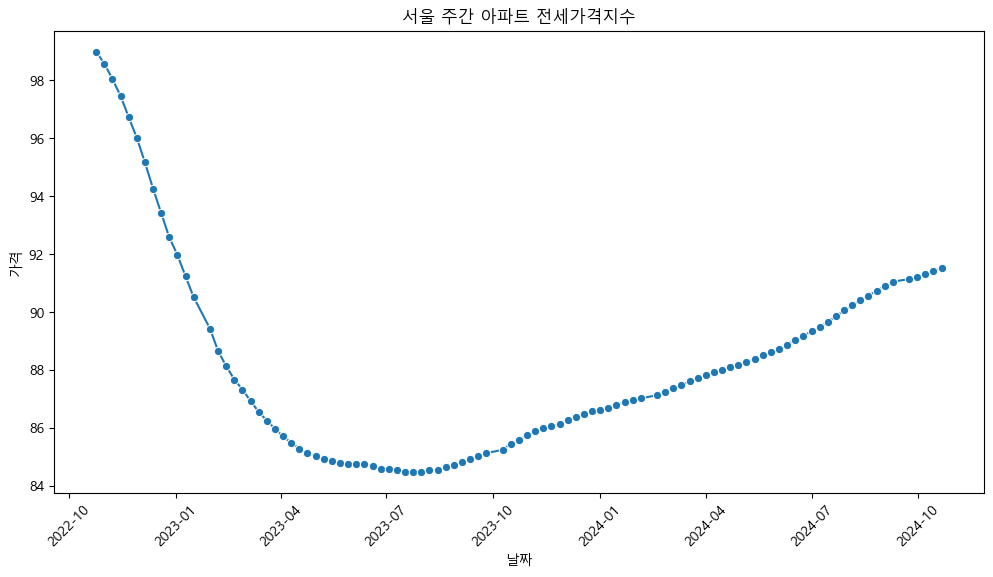

In [81]:
plt.figure(figsize=(12,6))
sns.lineplot(data=seoul_lease, x='날짜', y='가격', marker = 'o')
plt.title('서울 주간 아파트 전세가격지수')
plt.xticks(rotation=45)  # x축 레이블 회전
#plt.grid()

In [158]:
locals = sales[2:29]['지역명'].unique()
local_cnt = len(locals) 

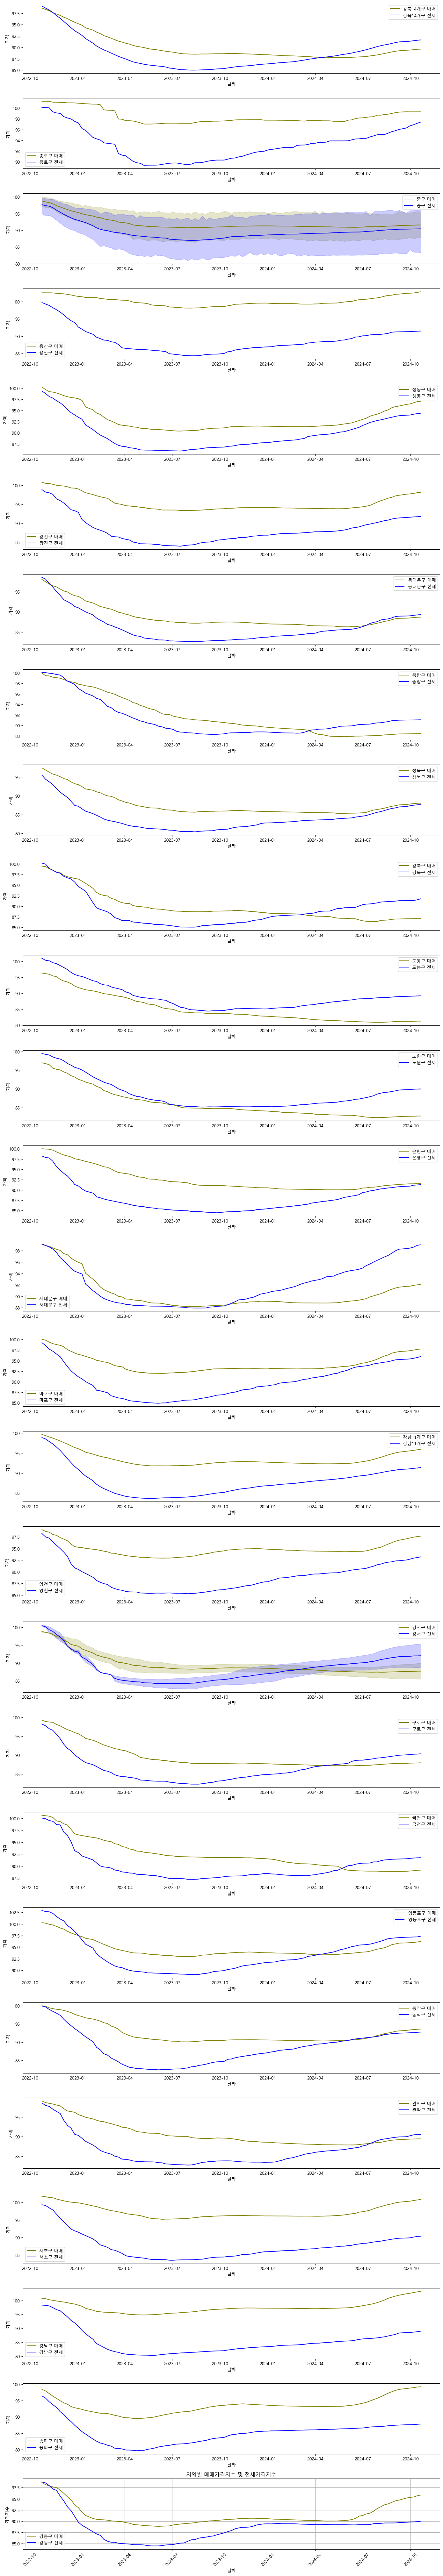

In [169]:
fig2 = plt.figure(figsize=(14, local_cnt*3),constrained_layout=True)
outer_grid = fig2.add_gridspec(local_cnt, 1)

for i,region in enumerate(locals):
    ax = fig2.add_subplot(outer_grid[i, :])
    sns.lineplot(data=sales_melt[sales_melt['지역명'] == region],x='날짜', y='가격', label=f'{region} 매매', color='olive')
    sns.lineplot(data=lease_melt[lease_melt['지역명'] == region],x='날짜', y='가격', label=f'{region} 전세', color='blue')

plt.title('지역별 매매가격지수 및 전세가격지수')
plt.xlabel('날짜')
plt.ylabel('가격지수')
plt.legend()
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

In [170]:
correlation = sales_melt['가격'].corr(lease_melt['가격'])

# 산점도 플롯
plt.figure(figsize=(8, 6))
sns.scatterplot(data=sales_melt, x='가격', y=lease_melt['가격'])
plt.title(f'매매가격과 전세가격의 관계 (상관계수: {correlation:.2f})')
plt.xlabel('매매가격')
plt.ylabel('전세가격')
plt.grid()
plt.tight_layout()
plt.show()



ValueError: could not convert string to float: '-'

In [171]:
# 차이 계산
sales_lease_diff = sales_melt.groupby('지역명')['가격'].mean() - lease_melt.groupby('지역명')['가격'].mean()

# 히트맵 시각화
plt.figure(figsize=(10, 6))
sns.heatmap(sales_lease_diff.values.reshape(-1, 1), annot=True, cmap='coolwarm', yticklabels=sales_lease_diff.index)
plt.title('지역별 매매가와 전세가의 차이')
plt.ylabel('지역명')
plt.xlabel('차이 (매매 - 전세)')
plt.tight_layout()
plt.show()

TypeError: agg function failed [how->mean,dtype->object]